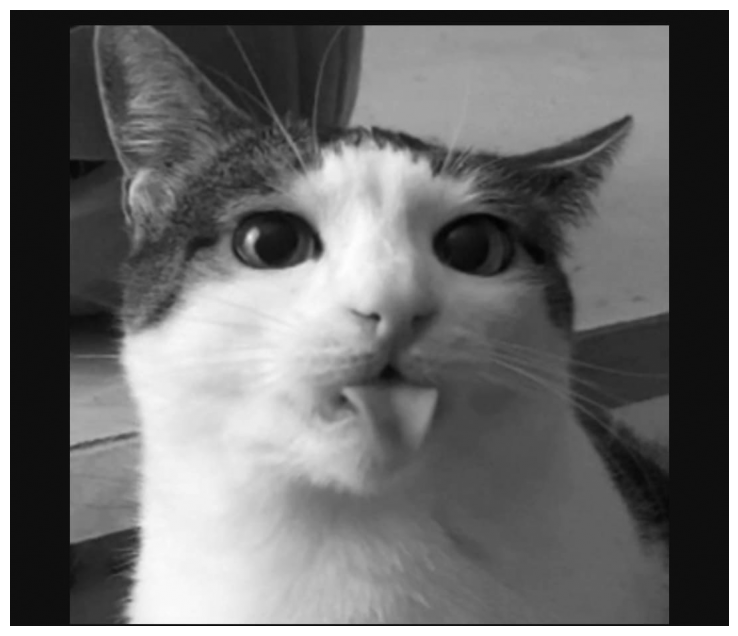

img size: (926, 1080)


In [2]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import scipy.linalg as ln
import numpy as np
import os
from PIL import Image
from math import log10, sqrt 
plt.rcParams['figure.figsize'] = [16, 8]
A = imread(os.path.join("../sumit/9dfaf33c-6aa6-445a-94a5-acf3f376f31c.jpg"))
X = A.dot([0.299, 0.5870, 0.114])
img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()
print('img size: %s'%str(X.shape))


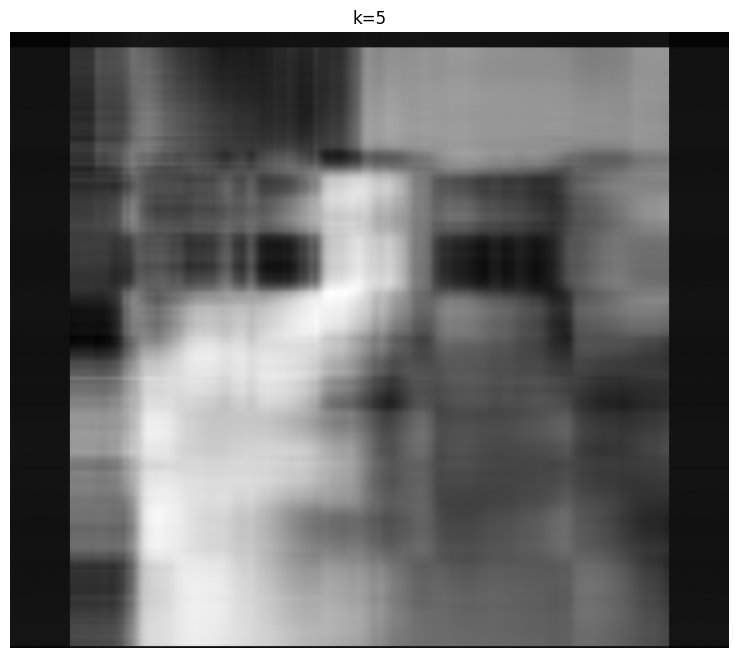

Original size: 1000080
compression/original size ratio: 0.010034197264218862
Compression rate is 1.0%
The mean sq.dev is:169
signal to noise ratio is:26dB


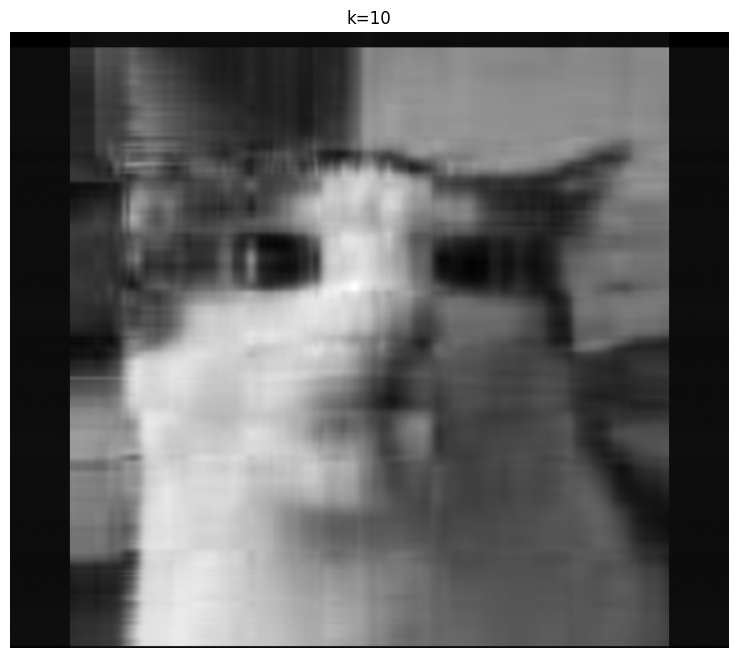

Original size: 1000080
compression/original size ratio: 0.020068394528437724
Compression rate is 2.01%
The mean sq.dev is:63
signal to noise ratio is:30dB


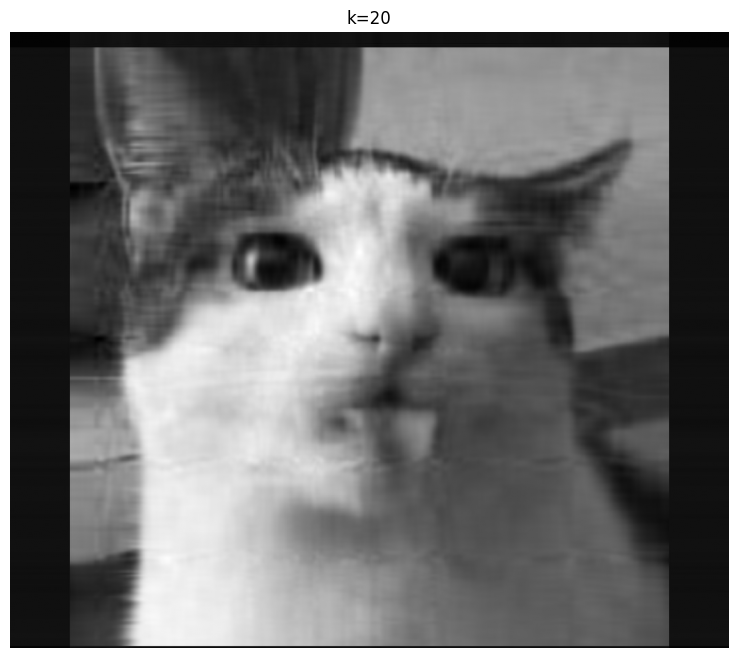

Original size: 1000080
compression/original size ratio: 0.04013678905687545
Compression rate is 4.01%
The mean sq.dev is:21
signal to noise ratio is:35dB


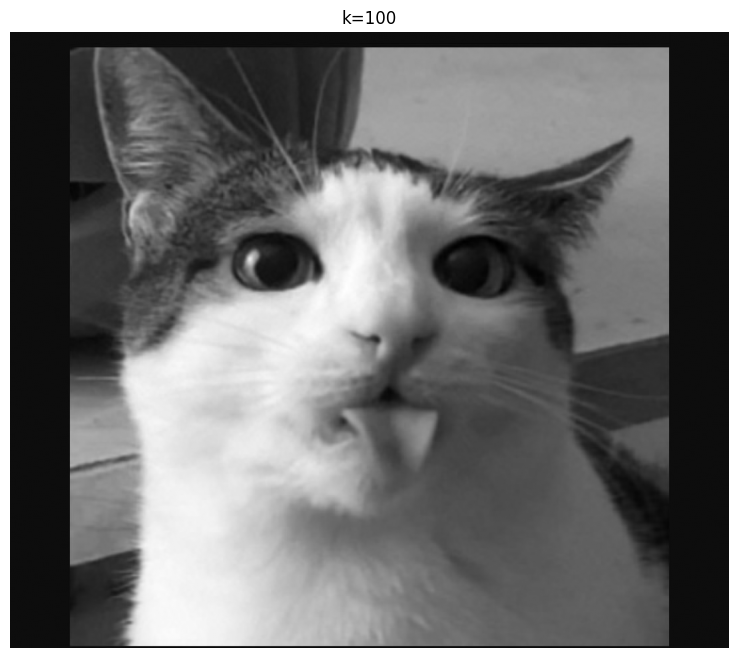

Original size: 1000080
compression/original size ratio: 0.20068394528437725
Compression rate is 20.07%
The mean sq.dev is:0
signal to noise ratio is:51dB


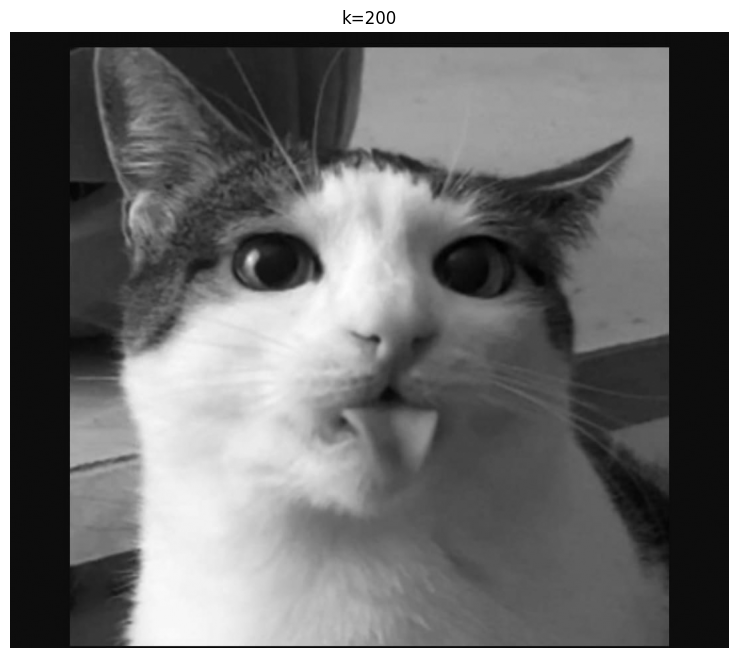

Original size: 1000080
compression/original size ratio: 0.4013678905687545
Compression rate is 40.14%
The mean sq.dev is:0
signal to noise ratio is:60dB


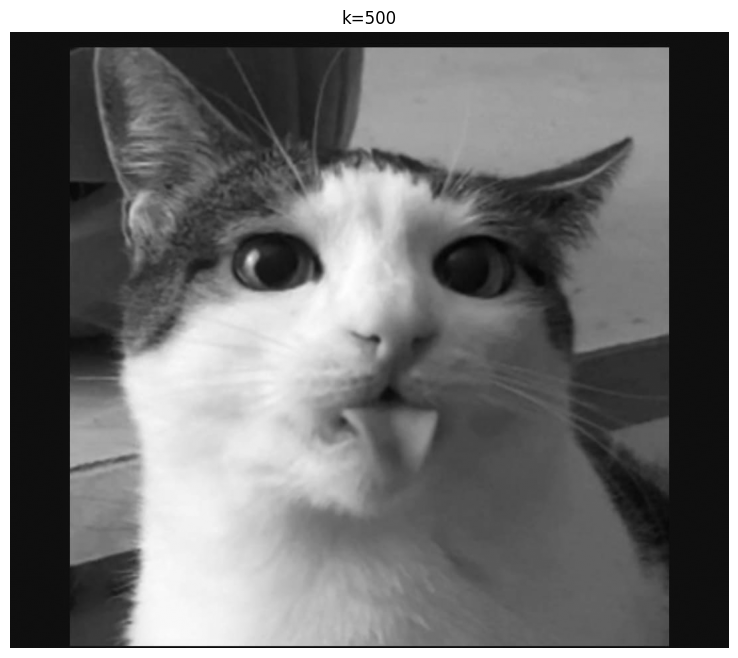

Original size: 1000080
compression/original size ratio: 1.0034197264218863
Compression rate is 100.34%
The mean sq.dev is:0
signal to noise ratio is:72dB


In [6]:
U, S, VT = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)
m = 926
n = 1080
j = 0
for k in (5,10,20,100,200,500):
    original_size= m*n
    compressed_size = k*(1+m+n)
    Xapprox = U[:,:k] @ S[0:k,:k] @ VT[:k,:]
    plt.figure(j+1)
    j += 1
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('k=' +str(k))
    plt.show()
    print('Original size:', original_size)
    ratio = compressed_size*1.0/original_size
    print('compression/original size ratio:', ratio)
    print('Compression rate is ' + str( round(ratio * 100 ,2)) + '%' )
    x= X.astype("float")
    y=Xapprox.astype("float")
    err = np.sum((x - y) ** 2)
    err /= float(X.shape[0] * Xapprox.shape[1])
    print('The mean sq.dev is:' +str(round(err)))
    max_pixel = 255.0
    srv = 20 * (log10(max_pixel/ sqrt(err)))
    print('signal to noise ratio is:' +str(round(srv)) + 'dB')